In [4]:
import pandas as pd 
import numpy as np
import torchvision
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pylab as plt
import sklearn 
from sklearn import linear_model as lm
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.utils import set_random_seed
from sklearn.preprocessing import OneHotEncoder 
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.optimizers import SGD
from tensorflow import keras 
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input,Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy 
from tensorflow.keras.callbacks import EarlyStopping 

In [5]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive'
os.chdir(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# import dataset
dataPath = '/content/drive/MyDrive/'

train = []
with open(dataPath + 'train.txt') as f:
    for line in f:
        train.append(list(map(float, line.split(','))))
train = np.array(train)

val = []
with open(dataPath + 'train.txt') as f:
    for line in f:
        val.append(list(map(float, line.split(','))))
val = np.array(val)

test = []
with open(dataPath + 'train.txt') as f:
    for line in f:
        test.append(list(map(float, line.split(','))))
test = np.array(test)

# q6

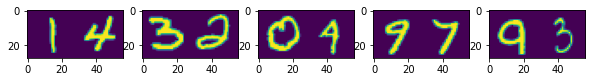

In [89]:
plt.figure(figsize = (10,10))
for i in range (5):
  a = np.reshape(train[i][:1568], (28,56))
  plt.subplot(1,5,i+1)
  plt.grid(False)
  plt.imshow(a)
plt.show()

From the plot shown above, we can see that when reading each line, the numbers from the digits row wise. So, I think the pixels were scanned out in row-major. 
From my observation, the last coordinate of each line should be the sum of two digits. For example, the first line gives us two digits 1 and 4. The last coordinate of the first line is 5, which is the sum of 1 and 4. I also run a few more lines and they also give me the same result. So, I conclude that the the last coordinate of each line is the sum of two digits.

# q7

In [13]:
train_Y = train[:, -1]
test_Y = test[:,-1]
val_Y = val[:,-1]

In [14]:
train_Y.shape

(20000,)

In [15]:
train_X = train[:,:1568]
test_X = test[:,:1568]
val_X = val[:,:1568]

In [16]:
train_X.max()

0.99609375

In [17]:
train_X.shape[0]

20000

In [18]:
trainX = train_X.reshape((20000, 28, 56, 1))
testX = test_X.reshape((20000, 28, 56, 1))
valX = val_X.reshape((20000, 28, 56, 1))

In [19]:
# one hot encode target values
trainY = to_categorical(train_Y)
testY = to_categorical(test_Y)
valY = to_categorical(val_Y)

In [20]:
valY.shape

(20000, 19)

## 7a 7b

In [35]:
seed_range = 6
epoch = 20

In [30]:
def model_7(seed):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,56,1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(19, activation='softmax'))
	# compile model
  np.random.seed(seed)
  opt = SGD(learning_rate=0.01,momentum = 0.9)
  model.compile(optimizer=opt, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

  return model

In [33]:
def savehistory(seed_range,epoch):
    for i in range(0, seed_range):
      set_random_seed(i)
      model = model_7(i)
      # define early stopping
      model = model.fit(trainX, trainY, 
          validation_data=(valX, valY), 
          epochs=20, 
          batch_size=32,
          verbose = 0)
      np.save('7_history%d.npy'%(i),model.history)


In [36]:
savehistory(seed_range, epoch)

### plot a and b

In [40]:
def plot_history(history, model_name):
  best_epoch = history['val_loss'].index(min(history['val_loss']))
  fig, ax = plt.subplots(figsize=(8,5))
  plt.title(' '.join([model_name, 'model learning curve - Max accuracy on test is %1.4f' % max(history['val_accuracy'])]))
  ax.set_xlabel('Epochs')
  ax.set_xticks(range(epoch),10)
  ax.set_ylabel('Loss')
  ax.plot(range(epoch), history['loss'], 'r', label='Train cross entropy')
  ax.plot(range(epoch), history['val_loss'], 'orange', label='Test cross entropy')
  ax.axvline(best_epoch, color='m', lw=4, alpha=0.5, label='Best epoch')
  x = np.repeat(1,epoch)
  ax.plot(range(epoch), x-history['accuracy'], 'g', label='Train miss-classiﬁcation error')
  ax.plot(range(epoch), x-history['val_accuracy'], 'b', label='Test miss-classiﬁcation error')
  ax.legend()
  plt.show()

seed:  0


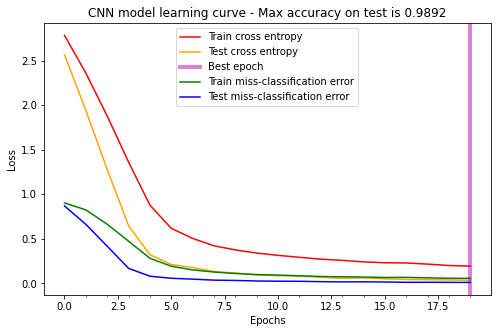

seed:  1


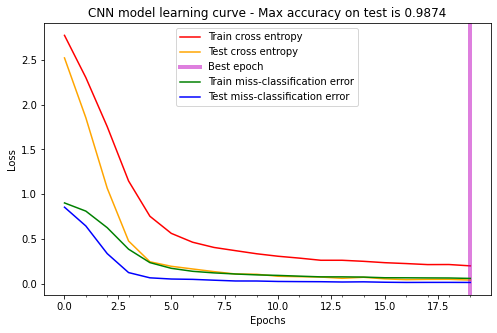

seed:  2


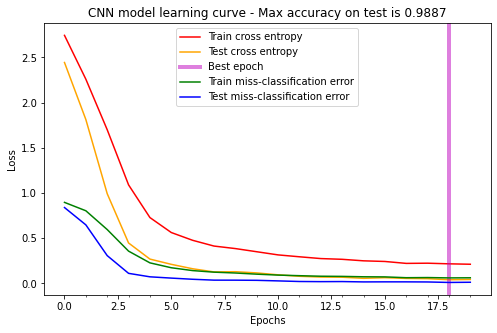

seed:  3


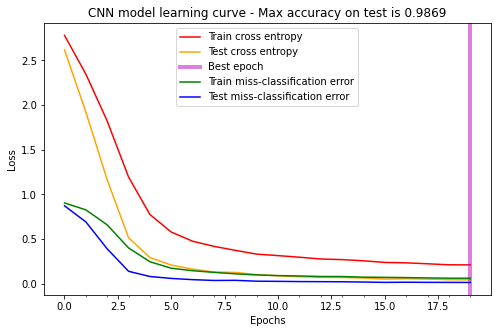

seed:  4


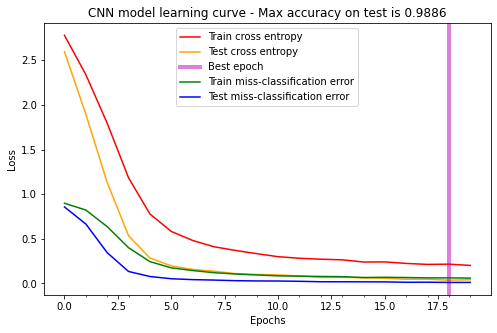

seed:  5


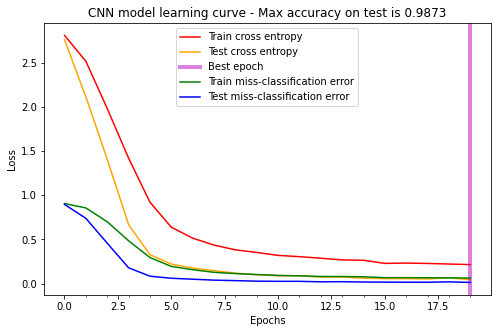

In [41]:
model_name = 'CNN'
for i in range(0,6):
  history = np.load('7_history%d.npy'%(i),allow_pickle='TRUE').item()
  print('seed: ',i)
  plot_history(history, model_name)

## 7c

From above plots, we can see when seed is 0, the model has the highest max accuracy. So, I think model with seed 0 will have best results of the learned W. I am going to use seed 0 for the following parts of this question.

In [50]:
model0 = model_7(0)

In [51]:
set_random_seed(0)
model0.fit(trainX, trainY, 
          validation_data=(trainX, trainY), 
          epochs=20, 
          batch_size=32,
          verbose = 0)


In [63]:
model0.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 26, 54, 32)        320       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 13, 27, 32)       0         
 g2D)                                                            
                                                                 
 dropout_84 (Dropout)        (None, 13, 27, 32)        0         
                                                                 
 conv2d_64 (Conv2D)          (None, 11, 25, 64)        18496     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 5, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_85 (Dropout)        (None, 5, 12, 64)       

In [67]:
model0.layers[10]

In [62]:
model0.layers[4]

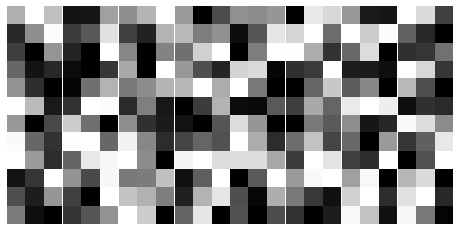

In [73]:
params = model0.layers[0].get_weights()[0].T
plt.figure(figsize=(8, 4))
for i in range(params.shape[0]):
    plt.subplot(4, 8, i + 1) 
    im = params[i,:]
    im =  im.reshape((3,3))
    plt.imshow( im, cmap = "gray", interpolation = "nearest")
    plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

# 7d

In [74]:
lr = [0.1,0.01,0.2,0.5]
momentum = [0.0, 0.5, 0.9]
set_random_seed(0)

In [77]:
def cnntune(lr, momentum):
    for i in lr:
      for j in momentum:
        model = Sequential()
        model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,56,1)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.25))
        model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.25))
        model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(100, activation='relu')) 
        model.add(Dropout(0.25))
        model.add(Dense(19, activation='softmax'))
        np.random.seed(0)
        opt = SGD(learning_rate=0.01,momentum = 0.9)
        model.compile(optimizer=opt, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
        model = model.fit(trainX, trainY, 
                          validation_data=(valX, valY), 
                          epochs=20, 
                          batch_size=32,
                          verbose = 0)

        np.save('7_test_lr:'+str(i)+'m:' + str(j)+'.npy',model.history)




In [78]:
cnntune(lr, momentum)

In [79]:
def plot_history(history, model_name):
  best_epoch = history['val_loss'].index(min(history['val_loss']))
  fig, ax = plt.subplots(figsize=(6,4))
  plt.title(' '.join([model_name, 'model learning curve - Max accuracy on test is %1.4f' % max(history['val_accuracy'])]))
  ax.set_xlabel('Epochs')
  ax.set_xticks(range(epoch),10)
  ax.set_ylabel('Error')
  ax.plot(range(epoch), history['loss'], 'r', label='Train Loss')
  ax.plot(range(epoch), history['val_loss'], 'orange', label='Test Loss')
  ax.axvline(best_epoch, color='m', lw=4, alpha=0.5, label='Best epoch')
  x = np.repeat(1,epoch)
  ax.plot(range(epoch), x-history['accuracy'], 'g', label='Train Accuracy')
  ax.plot(range(epoch), x-history['val_accuracy'], 'b', label='Test Accuracy')
  ax.legend()
  
  plt.show()

lr:  0.1 & momentum:  0.0


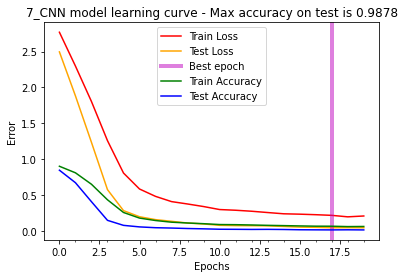

lr:  0.1 & momentum:  0.5


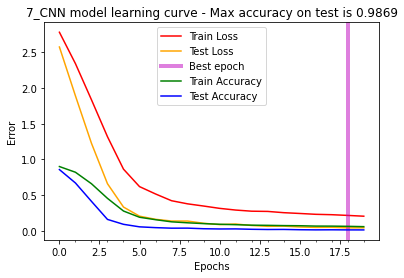

lr:  0.1 & momentum:  0.9


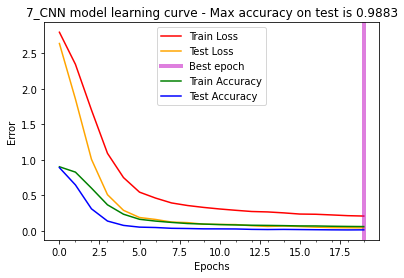

lr:  0.01 & momentum:  0.0


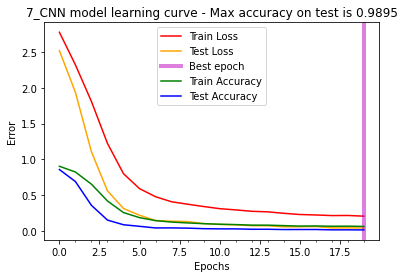

lr:  0.01 & momentum:  0.5


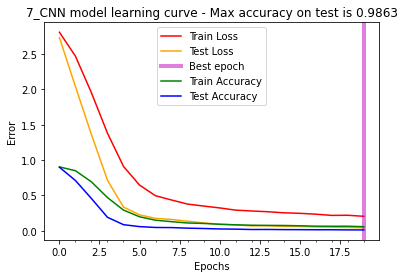

lr:  0.01 & momentum:  0.9


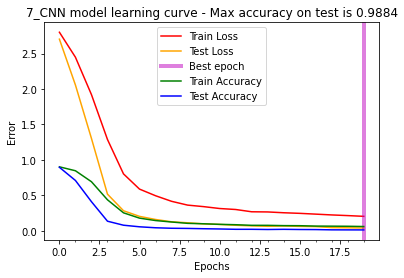

lr:  0.2 & momentum:  0.0


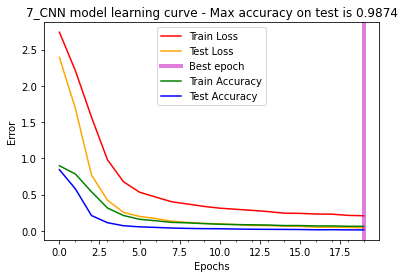

lr:  0.2 & momentum:  0.5


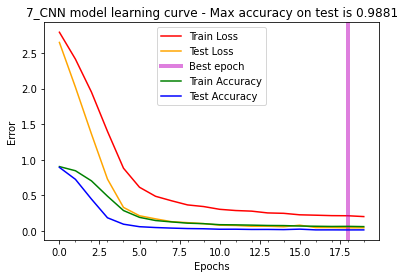

lr:  0.2 & momentum:  0.9


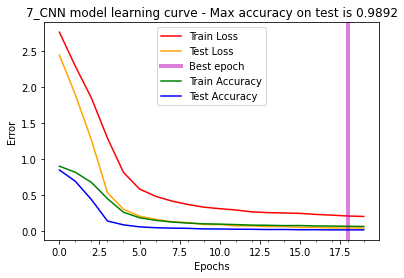

lr:  0.5 & momentum:  0.0


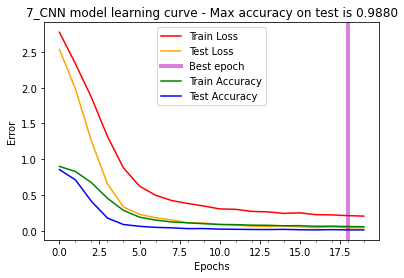

lr:  0.5 & momentum:  0.5


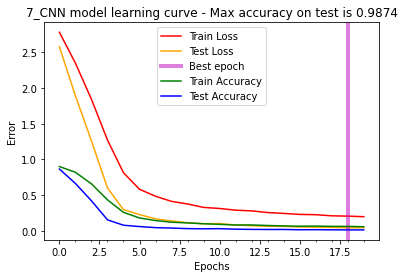

lr:  0.5 & momentum:  0.9


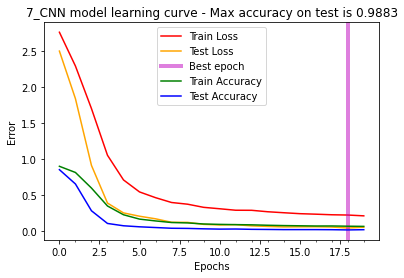

In [81]:
model_name = '7_CNN'
for i in lr:
  for j in momentum:
    history = np.load('7_test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
    print('lr: ', i,'& momentum: ',j)
    plot_history(history, model_name)

Batch Normalization is just another layer, so you can use it as such to create your desired network architecture.

The general use case is to use BN between the linear and non-linear layers in your network, because it normalizes the input to your activation function, so that you're centered in the linear section of the activation function (such as Sigmoid).

In [98]:
epoch = 100

In [99]:
def plot_history(history, model_name):
  best_epoch = history['val_loss'].index(min(history['val_loss']))
  fig, ax = plt.subplots(figsize=(12,5))
  plt.title(' '.join([model_name, 'model learning curve - Max accuracy on test is %1.4f' % max(history['val_accuracy'])]))
  ax.set_xlabel('Epochs')
  ax.set_xticks(range(epoch),10)
  ax.set_ylabel('Loss')
  ax.plot(range(epoch), history['loss'], 'r', label='Train cross entropy')
  ax.plot(range(epoch), history['val_loss'], 'orange', label='Test cross entropy')
  ax.axvline(best_epoch, color='m', lw=4, alpha=0.5, label='Best epoch')
  x = np.repeat(1,epoch)
  ax.plot(range(epoch), x-history['accuracy'], 'g', label='Train miss-classiﬁcation error')
  ax.plot(range(epoch), x-history['val_accuracy'], 'b', label='Test miss-classiﬁcation error')
  ax.legend()
  plt.show()

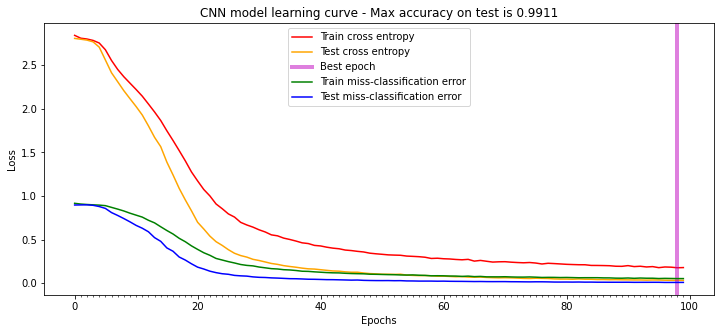

In [101]:
model_name = 'CNN'
history = np.load('7_history0_100.npy',allow_pickle='TRUE').item()
plot_history(history, model_name)


In [105]:
def tuneacc(lr,momentum):
  tune_accu = []
  for i in lr:
      for j in momentum:
        tunehistory = np.load('7_test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
        tune_accu.append(100*(1-np.mean(tunehistory['val_accuracy'])))
  return tune_accu

a = tuneacc(lr,momentum)
misclass = [a[i:i+3] for i in range(0,len(a), 3)]

df_misclass = pd.DataFrame(misclass,columns = [momentum[0],momentum[1],momentum[2]], 
                      index = [lr[0],lr[1],lr[2], lr[3]])
df_misclass.index.name = 'Learning Rate'
df_misclass.columns.name = 'Momentum'
df_misclass.style.set_precision(5).highlight_min(color = 'lightpink').set_caption("Mean Misclassification error in percentage(%)")

Momentum,0.0,0.5,0.9
Learning Rate,,,
0.1,12.52200,12.93375,12.10050
0.01,12.50250,13.80450,12.96800
0.2,11.04425,13.51600,12.61275
0.5,13.09500,12.82450,11.60550


In [104]:
def tuneacc(lr,momentum):
  tune_accu = []
  for i in lr:
      for j in momentum:
        tunehistory = np.load('7_test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
        tune_accu.append(100*(1-max(tunehistory['val_accuracy'])))
  return tune_accu

a = tuneacc(lr,momentum)
misclass = [a[i:i+3] for i in range(0,len(a), 3)]

df_misclass = pd.DataFrame(misclass,columns = [momentum[0],momentum[1],momentum[2]], 
                      index = [lr[0],lr[1],lr[2], lr[3]])
df_misclass.index.name = 'Learning Rate'
df_misclass.columns.name = 'Momentum'
df_misclass.style.set_precision(5).highlight_min(color = 'lightpink').set_caption("Min Misclassification error in percentage(%)")

Momentum,0.0,0.5,0.9
Learning Rate,,,
0.1,1.22000,1.31000,1.17500
0.01,1.05000,1.37000,1.15500
0.2,1.26000,1.19000,1.08000
0.5,1.19500,1.26000,1.17500


In [108]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,56,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19, activation='softmax'))
# compile model
np.random.seed(0)
opt = SGD(learning_rate=0.01,momentum = 0)
model.compile(optimizer=opt, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [109]:
model.fit(trainX, trainY, 
          validation_data=(valX, valY), 
          epochs=20, 
          batch_size=32,
          verbose = 0)

In [127]:
model.evaluate(testX, testY)

625/625 [==============================] - 7s 11ms/step - loss: 0.6848 - accuracy: 0.8228


[0.6847552061080933, 0.8228499889373779]